Lo primero que haremos será importar las librerías y funciones que usaremos a lo largo del proyecto

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
from joblib import Parallel, delayed
from time import time

Ahora generaremos datos para poder trabajar con ellos. Generaremos diez mil datos, los cuales estarán creados a partir de 17 centros y puntos en un radio alrededor de ellos en función de una distribución normal. Notemos que fijamos la semilla para que los resultados sean reproducibles. Finalmente, visualizamos los datos

Number of data points: 10000
Created a dataset that represents 17 clusters in 2 dimensions.


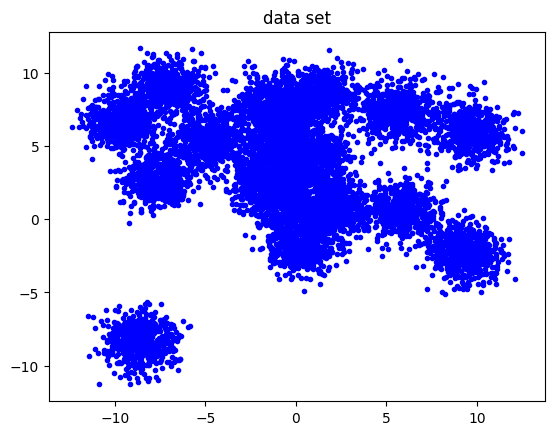

In [2]:
n_points = 10000
print("Number of data points:", n_points)
np.random.seed(0)
n_clusters = 17
dataset, _ = make_blobs(n_samples = n_points, n_features = 2, centers = n_clusters)
print("Created a dataset that represents", n_clusters, "clusters in", dataset.shape[1], "dimensions.")
plt.plot(dataset[:, 0], dataset[:, 1], 'b.')
plt.title('data set')
plt.show()

Basado en el código que nos facilitaron en canvas, implementamos un algoritmo de agrupamiento. Las modificaciones realizadas fueron puramente estéticas, siendo la más relevante que ya no guardamos todo el historial de los grupos y los centros, sino que solo guardamos los actuales. Además, se elimina el máximo número de iteraciones, esto es, corremos el algoritmo hasta que converja puesto que esta es la forma en que el algoritmo está descrito en la introducción de la tarea.

In [3]:
%%time

iterations = 0
k = 7
center = np.zeros([k, 2])
for c in range(k):
    center[c, 0] = float(c+1)/(k+1)
    center[c, 1] = 0.0

cluster = np.zeros(n_points, dtype = 'int') - 1

while True:
    
    iterations += 1
    
    old_center = np.copy(center)
    old_cluster = np.copy(cluster)

    # assignment step
    for p in range(n_points):
        minimum_distance = np.inf
        nearest_cluster = None
        for c in range(k):
            distance_to_cluster_c = np.sqrt((dataset[p,0] - old_center[c,0])**2 + (dataset[p,1] - old_center[c,1])**2)
            if distance_to_cluster_c < minimum_distance:
                minimum_distance = distance_to_cluster_c
                nearest_cluster = c
        cluster[p] = nearest_cluster
    
    # check convergence
    clusters_changed = False
    for p in range(n_points):
        if old_cluster[p] != cluster[p]:
            clusters_changed = True
    if not clusters_changed:
        print("Converged in", iterations, "iterations.\n")
        break

    # update step
    number_of_points_in_cluster = np.zeros(k, dtype='int')
    sum_of_locations = np.zeros([k, 2], dtype='float')
    for p in range(n_points):
        number_of_points_in_cluster[cluster[p]] += 1
        sum_of_locations[cluster[p], :] += dataset[p, :]
    for c in range(k):
        center[c,0] = sum_of_locations[c,0] / number_of_points_in_cluster[c]
        center[c,1] = sum_of_locations[c,1] / number_of_points_in_cluster[c]


Converged in 24 iterations.

CPU times: total: 6.09 s
Wall time: 9.55 s


El algoritmo terminó en 24 iteraciones y se tardó un total de 9.55 segundos. Graficámos los grupos y centros obtenidos, de tal forma de verificar que el algoritmo esté funcionando correctamente.

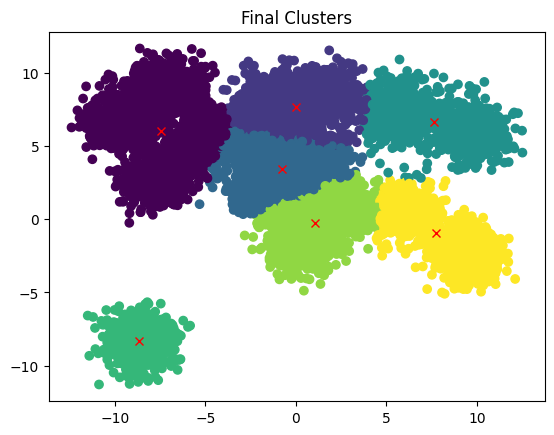

In [4]:
plt.scatter(dataset[:,0], dataset[:,1], c=cluster)
plt.plot(center[:,0], center[:,1], 'rx')
plt.title("Final Clusters")
plt.show()

Se verifica que el algoritmo está funcionando correctamente de acuerdo a la intuición que se tiene de grupos.

Ahora, procederemos a vectorizar el algoritmo

In [5]:
%%time

iterations = 0
k = 7
center = np.zeros([k, 2])
for c in range(k):
    center[c, 0] = float(c+1)/(k+1)
    center[c, 1] = 0.0

cluster = np.zeros(n_points, dtype = 'int') - 1

while True:
    
    iterations += 1
    old_center = np.copy(center)
    old_cluster = np.copy(cluster)
    
    # assignment step
    dis = cdist(dataset, old_center)
    cluster = np.argmin(dis, axis = 1)
    
    # check convergence
    if np.array_equal(cluster, old_cluster):
        print("Converged in", iterations, "iterations.\n")
        break

    # update step
    for c in range(k):
        center[c] = np.mean(dataset[cluster == c], axis = 0)


Converged in 24 iterations.

CPU times: total: 62.5 ms
Wall time: 65.3 ms


Como era de esperarse, al ser el mismo algoritmo, este convergió en 24 iteraciones. Sin embargo, esta ves se demoró 0.06 segundos, esto es, más de 100 veces menos tiempo que la implementación anterior. Grafiquemos la solución de tal forma de verificar que el algoritmo es correcto y que el resultado es el mismo que el anterior.

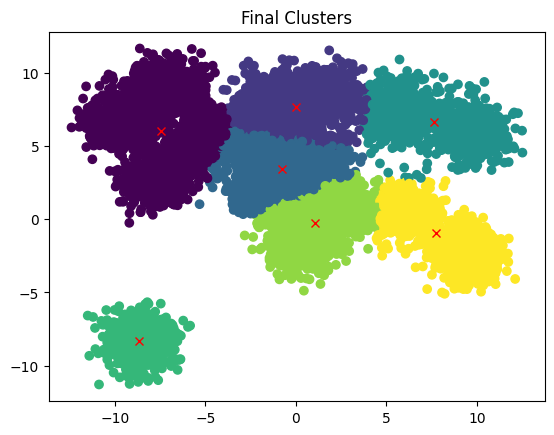

In [6]:
plt.scatter(dataset[:,0], dataset[:,1], c=cluster)
plt.plot(center[:,0], center[:,1], 'rx')
plt.title("Final Clusters")
plt.show()

Se verifica que el gráfico se corresponde con el anterior, por lo que es claro que el algoritmo efectivamente era equivalente. Algo importante que hay que notar con respecto al tiempo de ejecución es que mi computador durante la ejecución de los algoritmos en Python estaba usando 2 procesos, el primero con 37 hilos y el segundo con 2 hilos.

Ahora intentaremos encontrar el mejor valor de k. Para esto, vamos a probar con varios números de grupos distintos, en particular, consideraremos cada numero de grupo entre 1 y 25. Para cada instancia calcularemos la dispersión de la solución. Luego, graficaremos la dispersión en función del número de grupos para ver como evoluciona con respecto del número de grupos e intentar encontrar un punto de inflexión.

Converged in 2 iterations.
La dispersion para 1 clusters es de 63682.03711224571

Converged in 42 iterations.
La dispersion para 2 clusters es de 50968.91867509354

Converged in 9 iterations.
La dispersion para 3 clusters es de 41850.70768759627

Converged in 24 iterations.
La dispersion para 4 clusters es de 33765.20881735106

Converged in 52 iterations.
La dispersion para 5 clusters es de 28742.227675719038

Converged in 18 iterations.
La dispersion para 6 clusters es de 23755.738827879344

Converged in 24 iterations.
La dispersion para 7 clusters es de 21735.096254744007

Converged in 26 iterations.
La dispersion para 8 clusters es de 19726.163799962287

Converged in 36 iterations.
La dispersion para 9 clusters es de 18283.93809243717

Converged in 51 iterations.
La dispersion para 10 clusters es de 16870.77995476501

Converged in 49 iterations.
La dispersion para 11 clusters es de 15696.221085145979

Converged in 32 iterations.
La dispersion para 12 clusters es de 15227.70074331732

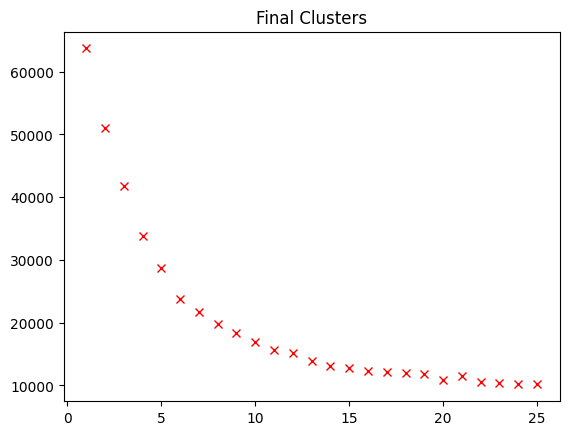

CPU times: total: 3.58 s
Wall time: 5.73 s


In [7]:
%%time

xdispersion = [k for k in range(1, 26)]
ydispersion = [0 for _ in range(1, 26)]

for k in range(1, 26):
    iterations = 0
    center = np.zeros([k, 2])
    for c in range(k):
        center[c, 0] = float(c+1)/(k+1)
        center[c, 1] = 0.0

    cluster = np.zeros(n_points, dtype = 'int') - 1

    while True:
    
        iterations += 1
        old_center = np.copy(center)
        old_cluster = np.copy(cluster)
    
        # assignment step
        dis = cdist(dataset, old_center)
        cluster = np.argmin(dis, axis = 1)
    
        # check convergence
        if np.array_equal(cluster, old_cluster):
            print("Converged in", iterations, "iterations.")
            break

        # update step
        for c in range(k):
            center[c] = np.mean(dataset[cluster == c], axis = 0)
    
    dispersion = 0.0
    for c in range(k):
        dispersion += np.sum(np.linalg.norm(dataset[cluster==c, :] - center[c,:], axis=1))
    print(f"La dispersion para {k} clusters es de {dispersion}\n")
    ydispersion[k-1] = dispersion
    
plt.plot(xdispersion, ydispersion, 'rx')
plt.title("Final Clusters")
plt.show()

El código tardó unos 6 segundos. A partir del gráfico intuitivamente una cantidad de grupos razonables podría ser cercano a 11. Es interesante notar que al inicio los datos se formaron a partir de 17 centroides, pero en la ejecución se crearon menos grupos. 

Ahora intentemos paralelizar la ejecución anterior, esto es, cada instancia del problema para diferente k lo calcularemos en paralelo. Para esto, crearemos una función tal que en función de k nos entregue la dispersión.

In [8]:
def fast_kmeans(dataset, k):

    center = np.zeros([k, 2])
    for c in range(k):
        center[c, 0] = float(c+1)/(k+1)
        center[c, 1] = 0.0

    cluster = np.zeros(n_points, dtype = 'int') - 1

    while True:
    
        old_center = np.copy(center)
        old_cluster = np.copy(cluster)
    
        # assignment step
        dis = cdist(dataset, old_center)
        cluster = np.argmin(dis, axis = 1)
    
        # check convergence
        if np.array_equal(cluster, old_cluster):
            break

        # update step
        for c in range(k):
            center[c] = np.mean(dataset[cluster == c], axis = 0)
    
    dispersion = 0.0
    for c in range(k):
        dispersion += np.sum(np.linalg.norm(dataset[cluster==c, :] - center[c,:], axis=1))
    return dispersion

Ahora usando la librería joblib podemos ejecutar en paralelo el bucle principal que fija el tamaño de los grupos. Al paralelizar vamos asignamos 2 procesos a joblib

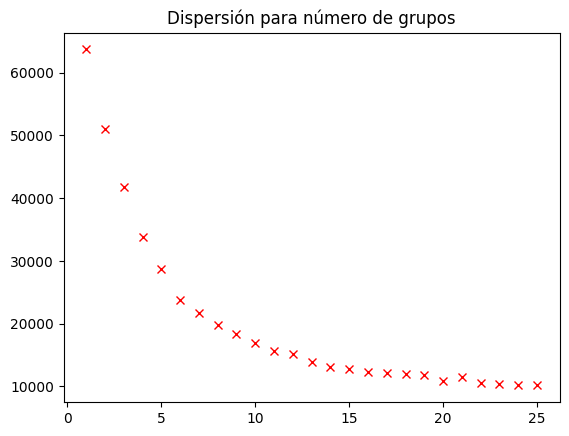

CPU times: total: 172 ms
Wall time: 4.7 s


In [9]:
%%time

xdispersion = [k for k in range(1, 26)]
ydispersion = Parallel(n_jobs = 2)(delayed(fast_kmeans)(dataset, k) for k in range(1, 26))

plt.plot(xdispersion, ydispersion, 'rx')
plt.title("Dispersión para número de grupos")
plt.show()

En esta oportunidad se demoro 4.7 segundos, lo cual es unos cuatro quintos del tiempo que se tardó en la ejecución anterior. Es un tiempo razonable teniendo en cuenta que se le dieron dos procesos. Una forma de verificar que joblib está funcionando correctamente es que se abrieron 3 procesos nuevos con 12 hilos cada uno destinados a python.

Ahora vamos a estudiar el tiempo de ejecución del algoritmo anterior en función de los procesos asignados a joblib, para esto hacemos un bucle y obtenemos el tiempo que se ha demorado. Además, estos datos los graficámos para poder visualizarlos mejor.

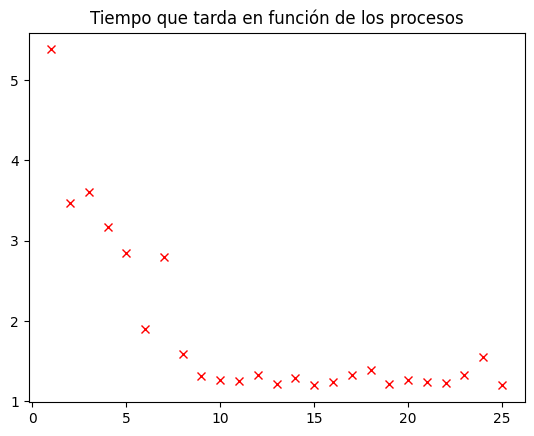

In [10]:
xprocesos = [i for i in range(1, 26)]
yprocesos = []

for procesos in range(1, 26):
    start = time()
    ydispersion = Parallel(n_jobs = procesos)(delayed(fast_kmeans)(dataset, k) for k in range(1, 26))
    end = time()
    yprocesos.append(end - start)
    
plt.plot(xprocesos, yprocesos, 'rx')
plt.title("Tiempo que tarda en función de los procesos")
plt.show()
    

Podemos ver que va disminuyendo al agregar más procesos, hasta llegar a los 9 procesos y en ese momento se mantiene constantemente bajo. Igual pareciera ser un poco estocástico cuánto se demora, pero se ve una mejor a más procesos activos.
Además, durante la ejecución anterior python tenía activos 28 procesos con la mayoría con 3 hilos y el principal con 41.

Ahora veamos que ocurre si paralelizamos el algoritmo lento. Primero implementemos una función análoga anterior con el algoritmo lento

In [11]:
def slow_kmeans(dataset, k):

    center = np.zeros([k, 2])
    for c in range(k):
        center[c, 0] = float(c+1)/(k+1)
        center[c, 1] = 0.0

    cluster = np.zeros(n_points, dtype = 'int') - 1

    while True:
    
        old_center = np.copy(center)
        old_cluster = np.copy(cluster)

        # assignment step
        for p in range(n_points):
            minimum_distance = np.inf
            nearest_cluster = None
            for c in range(k):
                distance_to_cluster_c = np.sqrt((dataset[p,0] - old_center[c,0])**2 + (dataset[p,1] - old_center[c,1])**2)
                if distance_to_cluster_c < minimum_distance:
                    minimum_distance = distance_to_cluster_c
                    nearest_cluster = c
            cluster[p] = nearest_cluster
    
        # check convergence
        clusters_changed = False
        for p in range(n_points):
            if old_cluster[p] != cluster[p]:
                clusters_changed = True
        if not clusters_changed:
            break

        # update step
        number_of_points_in_cluster = np.zeros(k, dtype='int')
        sum_of_locations = np.zeros([k, 2], dtype='float')
        for p in range(n_points):
            number_of_points_in_cluster[cluster[p]] += 1
            sum_of_locations[cluster[p], :] += dataset[p, :]
        for c in range(k):
            center[c,0] = sum_of_locations[c,0] / number_of_points_in_cluster[c]
            center[c,1] = sum_of_locations[c,1] / number_of_points_in_cluster[c]
    dispersion = 0.0
    for c in range(k):
        dispersion += np.sum(np.linalg.norm(dataset[cluster==c, :] - center[c,:], axis=1))
    return dispersion   

Ahora veamos cuánto se demora el algoritmo sin paralelización

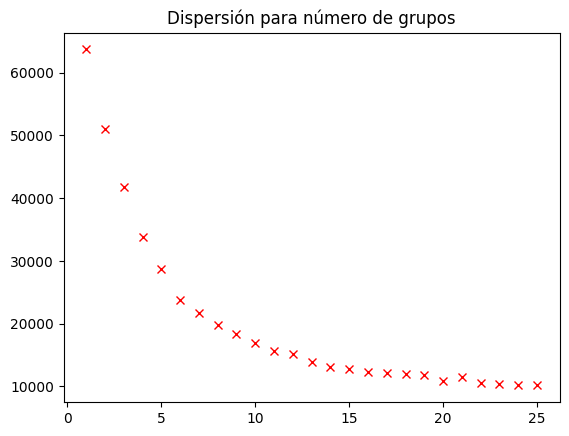

In [12]:
xdispersion = [k for k in range(1, 26)]
ydispersion = [0 for _ in range(1, 26)]

for k in range(1, 26):
    ydispersion[k-1] = slow_kmeans(dataset, k)

plt.plot(xdispersion, ydispersion, 'rx')
plt.title("Dispersión para número de grupos")
plt.show()

Podemos ver que el gráfico obtenido es el esperado, y que se ha tardado un total de 16 minutos.

Ahora veamos el comportamiento con la paralelización

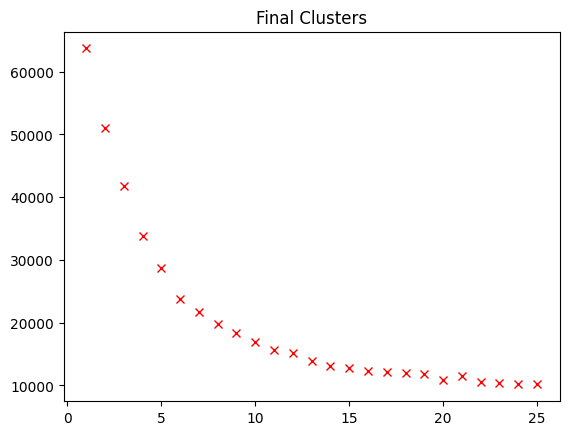

CPU times: total: 1.45 s
Wall time: 8min 50s


In [13]:
%%time

xdispersion = [k for k in range(1, 26)]
ydispersion = Parallel(n_jobs = 2)(delayed(slow_kmeans)(dataset, k) for k in range(1, 26))

plt.plot(xdispersion, ydispersion, 'rx')
plt.title("Final Clusters")
plt.show()

El gráfico nuevamente es el esperado y esta vez se ha demorado unos 8 minutos, esto es, la mitad que el anterior. Esto tiene sentido puesto que le brindamos dos procesos a joblib.

Con esto hemos concluído la parte computacional así que haremos una conclusiones de los resultados obtenidos.

Lo primero es notar que en el código que fue facilitado en Canvas no realiza ninguna paralelización. Esto es, realiza todo secuencialmente en un solo núcleo de la CPU.

Es por lo anterior que la implementación del algoritmo de forma vectorizada presenta una mejoría tan grande. Recordemos que la versión original tardó unos 9.5 segundos y la segunda unos 0.06, esto es, más de 100 veces menos. La diferencia podría ser incluso más pero para experimentos posteriores necesitabamos que la base de datos no sea extremadamente grande.

Esta diferencia se explica porque al usar librerías como numpy o scipy las operaciones están vectorizadas y por tanto se realizan de forma muy eficiente. Lo anterior se explica por dos motivos: El primer motivo es que están optimizadas a bajo nivel (por ejemplo en C o Fortran) y pueden aprovechar de mejor manera los recursos como por ejemplo el caché de la CPU. El segundo motivo es que dichas operaciones son paralelizadas internamente sin que tengamos que preocuparnos por ello, reduciendo notablemente el tiempo de ejecución cuando los volumenes de datos son elevados 

La diferencia de cómputo haciendo paralelización con joblib se puede evidenciar puesto que disminuye cuando le agregamos más procesos a joblib. En ambas implementaciones disminuyó, e incluso en el gráfico se puede ver una relación que nos indica que a más procesos asignados menor es el tiempo de ejecución (aunque no es tan monótona ya que tiene una gran componente estocástica).

Sin embargo, es importante señalar que cuando pasamos de uno a 2 procesos para la versión vectorizada el tiempo disminuyo a unos cuatro quintos del tiempo anterior mientras que la versión secuencial disminuyo a la mitad. Esto se debe a que como la versión secuencial no está tan optimizada para realizar paralelización internamente, esta paralelización "externa" le beneficia mucho más ya que anteriormente (a diferencia de la versión vectorizada) solo tenía un proceso secuencial y ahora tiene dos, de hecho, demoró practicamente la mitad lo cual es lo mejor que podría lograr. Una forma de verlo es que la versión secuencual tiene tanto por mejorar que es capaz de aprovechar de mejor manera las mejoras.

Lo ultimo es considerar mi hardware y como este afectó al experimento. Mi computador tiene 6 núcleos y soporta la tecnología hyper-threading, por lo que en la práctica tiene 12 hilos independientes. Notemos que antes en el administrador de tareas se veían más que 12 hilos, pero hay que diferenciar entre hilos de software e hilos de hardware.